# Challenge Description
###### We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.
As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should:
* Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.
* What are the main factors that drive employee churn? Do they make sense? Explain your findings.
* If you could add to this data set just one variable that could help explain employee churn, what would that be?

In [1]:
import numpy as np
import pandas as pd
#visu
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('employee_retention_data.csv', parse_dates = ['join_date','quit_date'])
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24702 non-null  float64       
 1   company_id   24702 non-null  int64         
 2   dept         24702 non-null  object        
 3   seniority    24702 non-null  int64         
 4   salary       24702 non-null  float64       
 5   join_date    24702 non-null  datetime64[ns]
 6   quit_date    13510 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [4]:
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

## Task one: create a table with 3 columns: day, employee_headcount, company_id

In [5]:
unique_date = pd.date_range(start = '2011-01-24', end = '2015-12-13', freq = 'D'
                           )
unique_company = sorted(df['company_id'].unique())

day = []
company = []
headcount = []

# loop date, company and company id
for date in unique_date:
    for i in unique_company:
        total_join = len(df[(df['join_date'] <= date)&(df['company_id']== i)])
        total_quit = len(df[(df['quit_date'] <= date)&(df['company_id']== i)])
        day.append(date)
        company.append(i)
        headcount.append(total_join-total_quit)
        
# create table
table = pd.DataFrame({'day': day, 'company_id': company, 'employee_headcount': headcount})
table

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
...,...,...,...
21415,2015-12-13,8,468
21416,2015-12-13,9,432
21417,2015-12-13,10,385
21418,2015-12-13,11,4


## Task two: Employee Churn Analysis
What are the main factors that drive employee churn? Do they make sense? Explain your findings.

In [6]:
#seperate stay and quit data
quit_data = df.dropna(subset = ['quit_date'])
stay_data = df[df['quit_date'].isnull()] 

### Feature Engineering

/Users/qq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

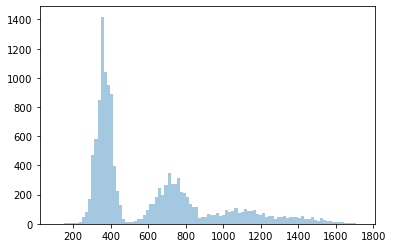

In [7]:
# Total working days
work_days = np.array(list(map(lambda x: x.days, quit_data['quit_date']-quit_data['join_date'])))
sns.distplot(work_days, bins = 100, kde=False)


* Looking at the histogram of employment_length, it looks like we could define early quitters as those people who quit within 1 yr or so. So, let’s create two classes of users : quit within 400 Days or not (if they haven’t been in the current company for at least 400 days, we remove them).

/Users/qq/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

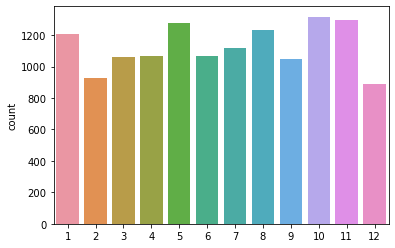

In [8]:
# Month for quiting
quit_month = np.array(list(map(lambda x: x.month, quit_data['quit_date'])))
sns.countplot(quit_month)

In [9]:
# There are no huge different between the month.

In [10]:
# Add work_days to the dataframe.
quit_data['work_days'] = work_days
quit_data.head()

<ipython-input-10-5bf733b34a95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quit_data['work_days'] = work_days


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,work_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578


# Decision Tree Model
Let’s create two classes of users : quit within 400 days or not 

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [12]:
# Choose the subset data
stop_date = pd.to_datetime('2015-12-13') - pd.DateOffset(days=400)

# Remove the employee haven't been in the current company for 400 days.
subset = df[df['join_date'] < stop_date]


quit = subset['quit_date'].isnull()|(subset['quit_date'] > subset['join_date'] + pd.DateOffset(days = 400))
subset['quit'] = 1 - quit.astype(int)

subset.head()

<ipython-input-12-9d2e60d96c08>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['quit'] = 1 - quit.astype(int)


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0


In [13]:
# change dept(categories metric) -> dept(numerical)
le = LabelEncoder()
subset['dept'] = le.fit_transform(subset['dept'])
subset.head()

<ipython-input-13-17d7d855dc3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['dept'] = le.fit_transform(subset['dept'])


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,0,28,89000.0,2014-03-24,2015-10-30,0
1,825355.0,7,4,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,4,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,0,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,1,23,276000.0,2011-10-17,2014-08-22,0


In [14]:
final_data = subset[['company_id', 'dept','seniority', 'salary', 'quit']]

In [15]:
from xgboost import XGBClassifier
from xgboost import plot_tree

In [16]:
#Modeling
X = final_data.drop('quit',axis=1)
y = final_data['quit']

/Users/qq/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:03:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


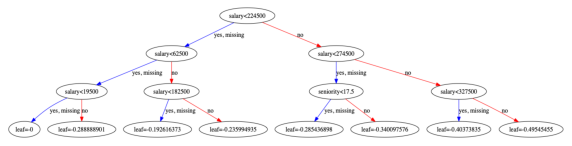

In [36]:
#visu-1
# Fit model no training data
model = XGBClassifier(max_depth=3, min_samples_leaf=30, random_state=42)
model.fit(X, y)
# plot single tree
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [34]:
fig.savefig('tree1.png')

In [30]:
#Modeling 
dtree_f = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, random_state=42)
dtree_f = dtree_f.fit(X,y)

#### data visu sources:
dtreeviz:
https://explained.ai/decision-tree-viz/index.html

xboost:
https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/

conda install -c conda-forge xgboost


In [31]:
#visu-2
import graphviz
import pydotplus
from graphviz import Digraph, Source
features = list(X.columns)
targets = ['Not quit', 'Quit']
dot_data = tree.export_graphviz(dtree_f, out_file=None, feature_names=features, class_names=targets,
                                filled=True, rounded=True, special_characters=True)  
#graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True

In [37]:
# Feature importance
importance = sorted(zip(features, dtree_f.feature_importances_), key=lambda x:x[1], reverse=True)
for feature, val in importance:
    print('{0:10s} | {1:.5f}'.format(feature, val))

salary     | 0.94632
seniority  | 0.02219
dept       | 0.01642
company_id | 0.01507


/Users/qq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/qq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


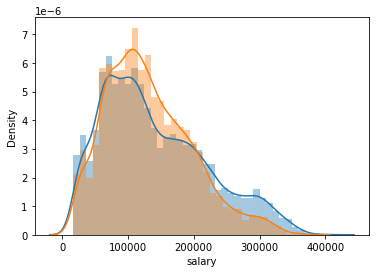

In [38]:
# Visualization
#hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
#fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(subset[subset['quit']==0]['salary'], 
             label='Not Quit')
sns.distplot(subset[subset['quit']==1]['salary'], 
             label='Quit')
plt.show()

In [32]:
#Modeling with train,test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
#prediction
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4062
           1       0.31      0.28      0.29      1700

    accuracy                           0.60      5762
   macro avg       0.51      0.51      0.51      5762
weighted avg       0.59      0.60      0.59      5762



In [28]:
accuracy_score(y_test,predictions,normalize=True)

0.5999652898299201

## conclusion:
1. Given how important is salary, I would definitely love to have as a variable the salary the employee who quit was offered in the next job. Otherwise, things like: promotions or raises received during the employee tenure would be interesting.
2. The major findings are that employees quit at year anniversaries or at the beginning of the year. Both cases make sense. Even if you don’t like your current job, you often stay for 1 yr before quitting + you often get stocks after 1 yr so it makes sense to wait. Also, the beginning of the year is well known to be the best time to change job: companies are hiring more and you often want to stay until end of Dec to get the calendar year bonus.
3. Employees with low and high salaries are less likely to quit. Probably because employees with high salaries are happy there and employees with low salaries are not that marketable, so they have a hard time finding a new job.